## Working with a larger example (Multiclass Classification):
When you have more than 2 classes as an option its knwn as multi-classe classification 

- This means if you have 3 different classes, its multiclass classification 
- It also means if you have 100 different classes its mumlticlass classification 

- We are going to build a neural netwok that can calssify different items of clothing

In [2]:
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt
import numpy as np
# we also need to import the fashion_mnist data set 
from tensorflow.keras.datasets import fashion_mnist


In [3]:
# the data has already been sorted into trianing adn test sets for us 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# show the first trainign example :
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# checking the sahpe of a single example :
train_data[0].shape, train_labels[0].shape

((28, 28), ())

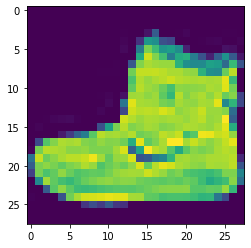

In [6]:
# now lest plot a single sample :

plt.imshow(train_data[0]);


In [7]:
train_labels[0]

9

In [8]:
# now we need to create a smal lsit so we can index the items onto our training lables os they are  human readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankle Boot" ]
len(class_names)

10

Text(0.5, 1.0, 'Bag')

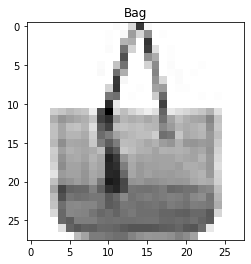

In [32]:
# lets plot an examaple image and its label 
index_of_choice = 35
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

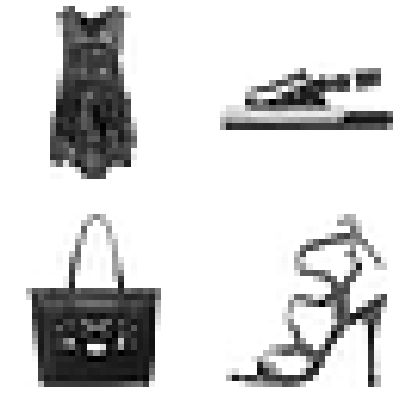

In [31]:
# plot multiple random images of fashion MNIST
import random 
plt.figure(figsize = (7,7))
for i in range (4):
    ax = plt.subplot(2,2,i+1)
    rand_index =random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)

For our multiclass classification model we are going to have to use some features of the parameters
- input shape = 28 x 28 
- output shape = 10 (one per class of clothing )
- loss functions = tf.keras.losses.CategoricalCrossentropy 
- output layer actiavtion = softmax 


In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

We need to use the SparseCategoricalCrossentropy if we dont have the trained data as one hot 


In [14]:
# lets try to use a higher ideal learning rate of 0.02
# lets recreate a model using just the training data to train on
tf.random.set_seed(42)

with tf.device('/cpu:0'):model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)), # this is used to flatten the data which will 
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(10, activation = "softmax")
   
])
model_1.compile(loss = "SparseCategoricalCrossentropy", # dependent on the problem type and tellsthe model how wrong the predictions are 
                optimizer =  tf.keras.optimizers.Adam(), # if we increase the relanign rate we will be able to find the patterns faster 
                metrics = ["accuracy"]) # the higher the number the better 


#fit the model
with tf.device('/cpu:0'): model_1.fit(train_data,
                                      train_labels,
                                      epochs = 10,
                                      validation_data = (test_data,test_labels))

Epoch 1/10
  49/1875 [..............................] - ETA: 5s - loss: 5.3749 - accuracy: 0.1218

2022-07-09 11:57:37.051825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1864/1875 [============================>.] - ETA: 0s - loss: 2.1508 - accuracy: 0.1644

2022-07-09 11:57:41.694206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 5s 3ms/step - loss: 2.1485 - accuracy: 0.1648 - val_loss: 1.7670 - val_accuracy: 0.2314
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6961 - accuracy: 0.2582 - val_loss: 1.6448 - val_accuracy: 0.2849
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6309 - accuracy: 0.2812 - val_loss: 1.6039 - val_accuracy: 0.3081
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6094 - accuracy: 0.2851 - val_loss: 1.6006 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5987 - accuracy: 0.2944 - val_loss: 1.5814 - val_accuracy: 0.3183
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5943 - accuracy: 0.3072 - val_loss: 1.5767 - val_accuracy: 0.3272
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5740 - accuracy: 0.3219 - val_loss: 1.5614 - val_accuracy: 0.3374
Epo

In [22]:
# lets rewrite with one hot encoded and CategoricalCrossentropy as the loss 
# first we will need to one hot encode the training data 
tf.one_hot(train_labels[:10], depth = 10)


<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [33]:

tf.random.set_seed(42)

with tf.device('/cpu:0'):model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)), # this is used to flatten the data which will 
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(10, activation = "softmax")
   
])
model_2.compile(loss = "CategoricalCrossentropy", # dependent on the problem type and tellsthe model how wrong the predictions are 
                optimizer =  tf.keras.optimizers.Adam(), # if we increase the relanign rate we will be able to find the patterns faster 
                metrics = ["accuracy"]) # the higher the number the better 


#fit the model
with tf.device('/cpu:0'): history_model_2 = model_2.fit(train_data, tf.one_hot(train_labels, depth = 10),
                                      epochs = 10,
                                      validation_data = (test_data, tf.one_hot(test_labels,depth = 10)))

Epoch 1/10
  50/1875 [..............................] - ETA: 3s - loss: 5.3135 - accuracy: 0.1219 

2022-07-09 13:16:44.358614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 2.1493 - accuracy: 0.1647

2022-07-09 13:16:48.388976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 5s 2ms/step - loss: 2.1485 - accuracy: 0.1648 - val_loss: 1.7670 - val_accuracy: 0.2314
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6961 - accuracy: 0.2582 - val_loss: 1.6448 - val_accuracy: 0.2849
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6309 - accuracy: 0.2812 - val_loss: 1.6039 - val_accuracy: 0.3081
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6094 - accuracy: 0.2851 - val_loss: 1.6006 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5987 - accuracy: 0.2944 - val_loss: 1.5814 - val_accuracy: 0.3183
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5943 - accuracy: 0.3072 - val_loss: 1.5767 - val_accuracy: 0.3272
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5740 - accuracy: 0.3219 - val_loss: 1.5614 - val_accuracy: 0.3374
Epo

In [24]:
# now lets get a model summary 
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [25]:
train_data.min(), train_data.max()

(0, 255)

In [28]:
# neural networks prefer data to be scaled (or normalized) this means they like teh data to have the nubers between 0 and 1 
# we can get our training and testing data byween 0 adn 1 by dividing by the maximum 
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [29]:

tf.random.set_seed(42)

with tf.device('/cpu:0'):model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)), # this is used to flatten the data which will 
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(10, activation = "softmax")
   
])
model_3.compile(loss = "CategoricalCrossentropy", # dependent on the problem type and tellsthe model how wrong the predictions are 
                optimizer =  tf.keras.optimizers.Adam(), # if we increase the relanign rate we will be able to find the patterns faster 
                metrics = ["accuracy"]) # the higher the number the better 


#fit the model
with tf.device('/cpu:0'): history_model_3 = model_3.fit(train_data_norm, tf.one_hot(train_labels, depth = 10),
                                      epochs = 10,
                                      validation_data = (test_data_norm, tf.one_hot(test_labels,depth = 10)))

Epoch 1/10
  65/1875 [>.............................] - ETA: 4s - loss: 2.2300 - accuracy: 0.1572

2022-07-09 12:14:17.510390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1856/1875 [============================>.] - ETA: 0s - loss: 1.0381 - accuracy: 0.6465

2022-07-09 12:14:22.076072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

<AxesSubplot:title={'center':'Normalised data'}>

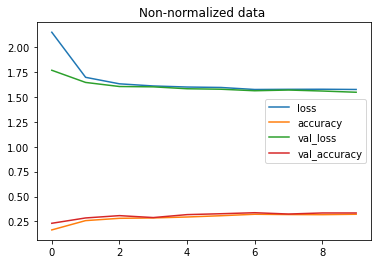

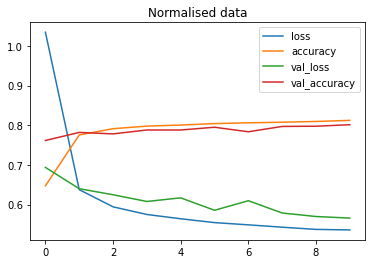

In [35]:
# now lets polit the normalised data loss curves 
import pandas as pd
pd.DataFrame(history_model_2.history).plot(title = "Non-normalized data ")
pd.DataFrame(history_model_3.history).plot(title = "Normalised data")

Notice that with the noralised data we see a significant decrease in the loss and validation loss alongside a large increase in the accuracy and validation accuracy 
- when conparing the reuslts, teh same model with even slightly different data can produce dramatically different result. So whne comparing the models its importnant to compare them on the same criteria. dont change a lot of variables and compare, only change one thing and compare to ditermine the factor that causes the change 



## Finding the ideal learning rate:

In [44]:
# lets try to use a higher ideal learning rate of 0.02
# lets recreate a model using just the training data to train on
tf.random.set_seed(42)

with tf.device('/cpu:0'):model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)), # this is used to flatten the data which will 
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(10, activation = "softmax")
   
])
model_4.compile(loss = "SparseCategoricalCrossentropy", # dependent on the problem type and tellsthe model how wrong the predictions are 
                optimizer =  tf.keras.optimizers.Adam(), # if we increase the relanign rate we will be able to find the patterns faster 
                metrics = ["accuracy"]) # the higher the number the better 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#fit the model
with tf.device('/cpu:0'): model_4_history = model_4.fit(train_data_norm,
                                      train_labels,
                                      epochs = 40,
                                      validation_data = (test_data,test_labels),
                                      callbacks = [lr_scheduler])

Epoch 1/40
  72/1875 [>.............................] - ETA: 3s - loss: 2.2174 - accuracy: 0.1567

2022-07-09 13:36:43.412198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1856/1875 [============================>.] - ETA: 0s - loss: 1.0381 - accuracy: 0.6465

2022-07-09 13:36:47.380159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 99.9192 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 108.5675 - val_accuracy: 0.7350 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 104.2177 - val_accuracy: 0.7335 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 143.8113 - val_accuracy: 0.6955 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 154.3259 - val_accuracy: 0.6986 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 134.0122 - val_accuracy: 0.7042 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'learning Rate vs Loss ')

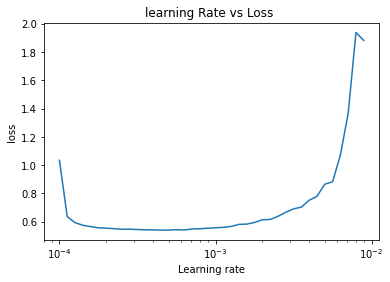

In [45]:
# not lets plot the leraning rate decay curve
# formula : lrs = 1e-4 * (10** (tf.range(epochs)/20)
lrs = 1e-4 * (10** (tf.range(40)/20))
plt.semilogx(lrs, model_4_history.history["loss"]) # here we are trying to plot with long on the x axis 
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("learning Rate vs Loss ")

In [49]:
# lets refit a model iwth the ideal learning rate 
# lets try to use a higher ideal learning rate of 0.02
# lets recreate a model using just the training data to train on
tf.random.set_seed(42)

with tf.device('/cpu:0'):model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)), # this is used to flatten the data which will 
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"), 
    tf.keras.layers.Dense(10, activation = "softmax")
   
])
model_5.compile(loss = "SparseCategoricalCrossentropy", # dependent on the problem type and tellsthe model how wrong the predictions are 
                optimizer =  tf.keras.optimizers.Adam(lr = 0.001), # if we increase the relanign rate we will be able to find the patterns faster 
                metrics = ["accuracy"]) # the higher the number the better 


#fit the model
with tf.device('/cpu:0'): model_5_history = model_5.fit(train_data_norm,
                                      train_labels,
                                      epochs = 20,
                                      validation_data = (test_data,test_labels))

/Users/janadhi/miniforge3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
  66/1875 [>.............................] - ETA: 4s - loss: 2.2277 - accuracy: 0.1567

2022-07-09 13:52:51.362423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1865/1875 [============================>.] - ETA: 0s - loss: 1.0365 - accuracy: 0.6469

2022-07-09 13:52:56.166774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 99.9192 - val_accuracy: 0.7298
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 108.3327 - val_accuracy: 0.7341
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 102.6737 - val_accuracy: 0.7373
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 132.9137 - val_accuracy: 0.7042
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 150.7092 - val_accuracy: 0.7028
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 126.4341 - val_accuracy: 0.7159
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 118.1338 - val_accurac

## Evaluating a multiclass classification model:
To evaluate our multiclass classification model we could:
- Evaluate its preformance using other classification metrics (such as a confusion matrix)
- asses some of its preoduciton (through visualisation)
- improve its results(by training it for longer or chanigng the architecture )
- save and export it for use in an application


In [68]:
# lets create a confusion matrix 
# making a visual of the confusion matrix 
# this is going to utelise the sklearn plot_confusion matrix

def draw_confusion_matrix(y_true, y_preds, classes = None, figsize =(10,10), text_size = 15 ):
  from sklearn.metrics import confusion_matrix
  import itertools 

  # creating teh confusion matrix 
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float")/cm.sum(axis=1) [:, np.newaxis]
  n_classes = cm.shape[0]

  #Lets make it look good
  fig, ax = plt.subplots(figsize=figsize)
  # creating a matric plot 
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)




  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes:
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)


  threshold = (cm.max()+ cm.min())/2.

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [48]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [50]:
# lets make some preductions with model_5
y_probs = model_5.predict(test_data_norm)
#remember to make predictions on the same type of data that we trained on   


2022-07-09 13:55:14.735176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 3ms/step


In [54]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]
#the highest number in the array indicate the index of which our model thinks the item is 

(array([8.5630593e-11, 3.5361671e-13, 2.6633830e-05, 4.6356419e-08,
        5.0949908e-05, 9.6119292e-02, 8.1778403e-08, 9.1868691e-02,
        4.0605315e-03, 8.0787379e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [55]:
# lets convert all of teh prediction probabilities into integers 
y_preds = y_probs.argmax(axis = 1)
# view the first 10 preduction labels 
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [52]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [57]:
# lets see what the confusion matrix looks like without the function:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, 
                 y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

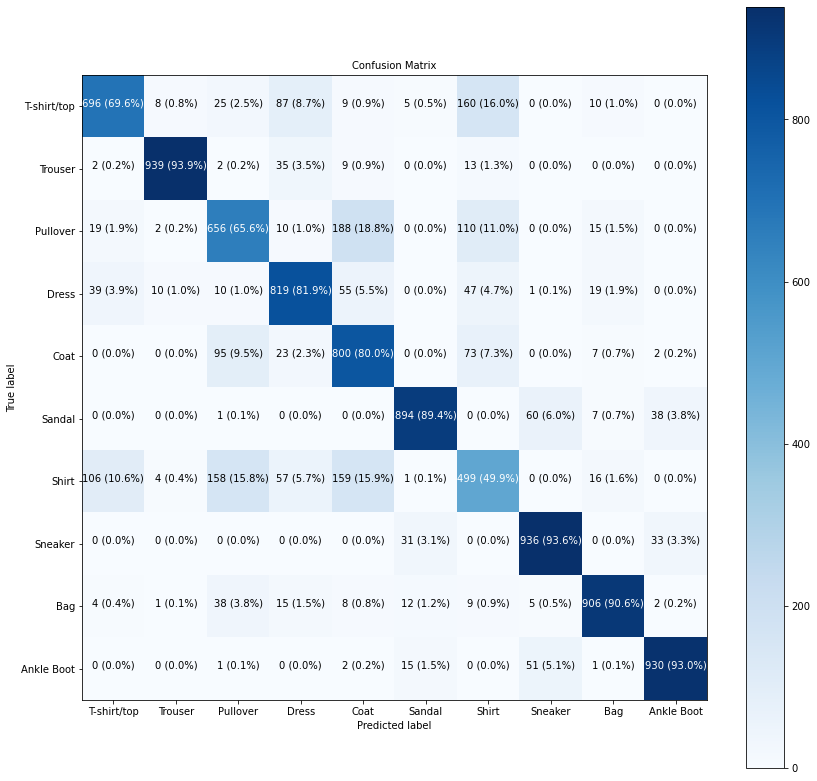

In [70]:
draw_confusion_matrix(y_true = test_labels, y_preds = y_preds, classes = class_names, figsize = (14,14), text_size = 10 )